# 2016 Election Donations Data Analysis - Data Visualizations


## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

- Campaign contributions to the 2016 U.S. presidential primary races made in California: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing
- This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/)
- Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns #added this for question 1

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('../2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/var/folders/w4/mykv87ns3h3blj3jw28kzwd80000gn/T/ipykernel_80724/2097169647.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('../2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

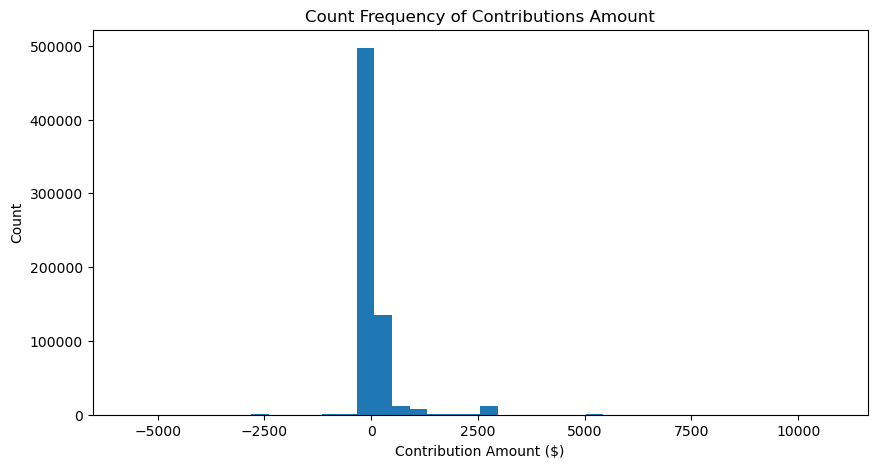

In [2]:
plt.figure(figsize=(10,5))
plt.hist(contrib.contb_receipt_amt, bins = 40) 
plt.title("Count Frequency of Contributions Amount")
plt.xlabel("Contribution Amount ($)")
plt.ylabel("Count")
pass

- **1a answer here:** Based on the histogram, the contributions in range -$1000 to $1000 seem to have the highest count frequency.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

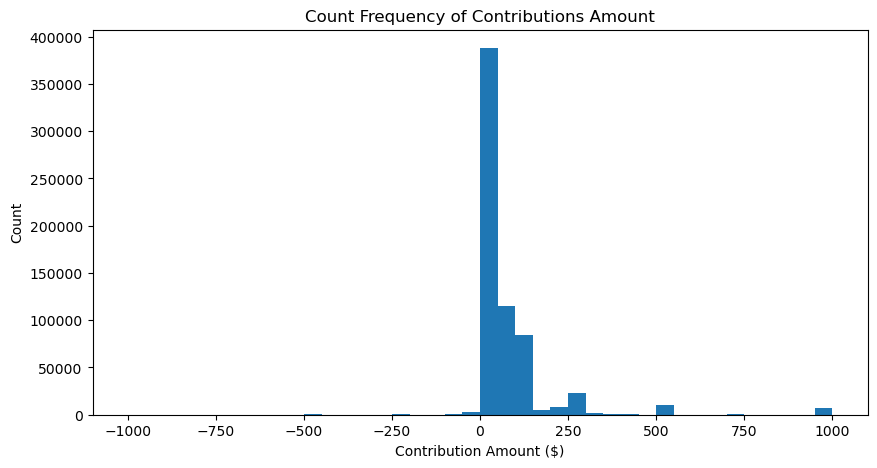

In [3]:
zoomin = contrib[(contrib.contb_receipt_amt >= -1000) & (contrib.contb_receipt_amt <= 1000)]["contb_receipt_amt"]

plt.figure(figsize=(10,5))
plt.hist(zoomin,bins=40) 
plt.title("Count Frequency of Contributions Amount")
plt.xlabel("Contribution Amount ($)")
plt.ylabel("Count")
pass

- **1b answer here:** Based on the two histograms from 1a and 1b, it seems like the range of contributions from $0 to about $125 has the highest count frequency. Within that range, the most contributions seem to be about less than $100. It also shows how deceiving histogram from question 1a may be. That histogram makes it seem like there are multiple values less than 0, but really, there is just a very small amount of negative contributions.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

In [4]:
contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


- **1c (part 1) answer here:** To create this chart, we'll need information from the contrib dataset
    - The candidate ID's:
        - P00003392: Clinton, Hillary Rodham 
        - P60007168: Sanders, Bernard
    - Date column:
        - `contb_receipt_dt`
    - Add lines for: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016

    **Steps**
    1. Create a simplified dataframe for Bernie Sanders and Hillary Clinton with only these necessary variables: "cand_id", "cand_nm", "contb_receipt_amt", "contb_receipt_dt".
    2. Groupby date and sum contributions for each unique date for each dataframe
    3. Create chart labels, the chart and annotations.

In [5]:
# First create a simplified dataframe for Bernie Sanders
bernie_df = contrib[contrib.cand_id == 'P60007168'][["cand_id", "cand_nm", "contb_receipt_amt", "contb_receipt_dt"]].reset_index(
        ).drop(columns="index").rename(columns = {"cand_id": "candidate_id", "cand_nm": "candidate_name",
                                                 "contb_receipt_amt": "contribution_amount", "contb_receipt_dt": "contribution_date"}) 
print(f'there are {bernie_df.shape[0]} entries for Bernie Sanders.')
bernie_df.head(3)

there are 379284 entries for Bernie Sanders.


,candidate_id,candidate_name,contribution_amount,contribution_date
0,P60007168,"Sanders, Bernard",40.00,2016-03-04
1,P60007168,"Sanders, Bernard",35.00,2016-03-05
2,P60007168,"Sanders, Bernard",100.00,2016-03-06


In [6]:
# Next I'll groupby the date and sum total contributions for each unique date
bernie_contrib = bernie_df[["contribution_amount", "contribution_date"]].groupby("contribution_date").sum().reset_index()
print(f'there are {bernie_contrib.shape[0]} unique contribution dates for Bernie Sanders.')
bernie_contrib.head(3)

there are 389 unique contribution dates for Bernie Sanders.


,contribution_date,contribution_amount
0,2015-05-04,"1,250.00"
1,2015-05-05,-130.00
2,2015-05-06,"1,850.00"


In [7]:
# Now I'll create a simplified dataframe for Hillary Clinton
hillary_df = contrib[contrib.cand_id == 'P00003392'][["cand_id", "cand_nm", "contb_receipt_amt", "contb_receipt_dt"]].reset_index(
        ).drop(columns="index").rename(columns = {"cand_id": "candidate_id", "cand_nm": "candidate_name",
                                                 "contb_receipt_amt": "contribution_amount", "contb_receipt_dt": "contribution_date"})
print(f'there are {hillary_df.shape[0]} entries for Hillary Clinton.')
hillary_df.head(3)

there are 171104 entries for Hillary Clinton.


,candidate_id,candidate_name,contribution_amount,contribution_date
0,P00003392,"Clinton, Hillary Rodham",50.00,2016-04-26
1,P00003392,"Clinton, Hillary Rodham",200.00,2016-04-20
2,P00003392,"Clinton, Hillary Rodham",5.00,2016-04-02


In [8]:
# Next I'll groupby the date and sum total contributions for each unique date
hillary_contrib = hillary_df[["contribution_amount", "contribution_date"]].groupby("contribution_date").sum().reset_index()
print(f'there are {hillary_contrib.shape[0]} unique contribution dates for Hillary Clinton.')
hillary_contrib.head(3)

there are 424 unique contribution dates for Hillary Clinton.


,contribution_date,contribution_amount
0,2015-04-11,6.00
1,2015-04-12,"197,127.24"
2,2015-04-13,"189,423.16"


In [9]:
# Obtain markers for the total contribution amounts on primary debate dates for each candidate
debate_dates= [pd.to_datetime('2016-01-17'), pd.to_datetime('2016-02-11'), pd.to_datetime('2016-03-09')]

b_amount = [bernie_contrib.contribution_amount[i] for i in range(bernie_contrib.shape[0]) for d in debate_dates if bernie_contrib.contribution_date[i] == d] 
print("contribution total amounts for Bernie Sanders on Primary Debates:", b_amount)

h_amount = [hillary_contrib.contribution_amount[i] for i in range(hillary_contrib.shape[0]) for d in debate_dates if hillary_contrib.contribution_date[i] == d] 
print("contribution total amounts for Hillary Clinton on Primary Debates:", h_amount)

contribution total amounts for Bernie Sanders on Primary Debates: [73289.05, 104185.75, 368002.65]
contribution total amounts for Hillary Clinton on Primary Debates: [26926.53, 205812.63, 190820.6]


Both Bernie and Hillary have the same unique dates, so I only made one labels list. I discovered this by using the same method above, except with `hillary.contribution_date.unique()` but didn't want to keep that cell due to space. 

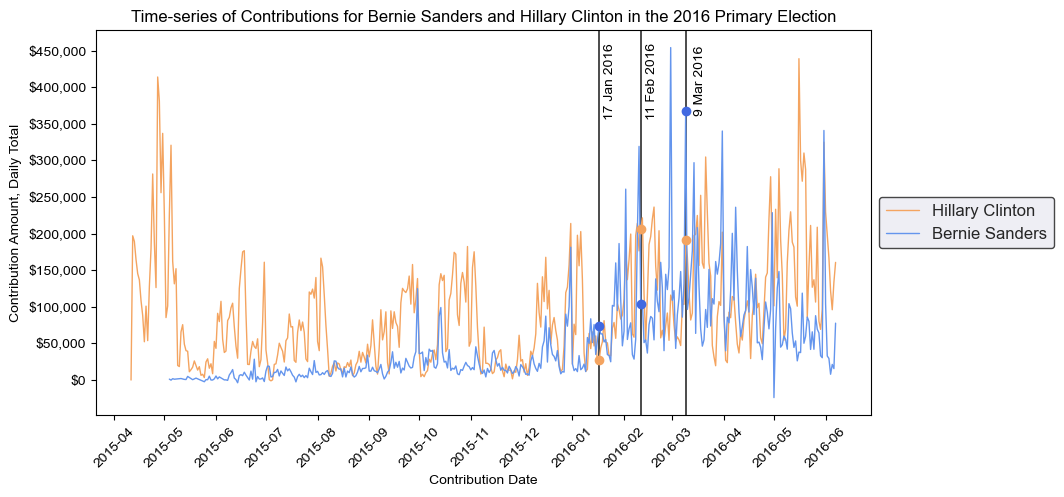

In [10]:
# Next I'll use the dataframes above for each candidate to make the chart
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Plotting the figure.
fig, ax = plt.subplots(figsize = (10,5))
sns.set()

# Adding vertical lines for primary debates 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
# which are listed in year-month-day format: 2016-01-17, 2016-02-11, 2016-03-09
ax.axvline(x = pd.to_datetime('2016-01-17'), color = 'k', ls = "-", lw = 1.1)
ax.axvline(x = pd.to_datetime('2016-02-11'), color = 'k', ls = "-", lw = 1.1)
ax.axvline(x = pd.to_datetime('2016-03-09'), color = 'k', ls = "-", lw = 1.1)

# Plotted Hillary first since she has more points on the chart
ax.plot(hillary_contrib["contribution_date"], hillary_contrib["contribution_amount"], color = "sandybrown", lw = 1, label = "Hillary Clinton")
ax.plot(bernie_contrib["contribution_date"], bernie_contrib["contribution_amount"], color = "cornflowerblue", lw = 1, label = "Bernie Sanders")


# Setting ticks on x axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Setting ticks on y axis and fixing format
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.yticks(range(0, int(max(bernie_contrib["contribution_amount"])), 50000))

# Adding markers for total contribution amounts on primary debates for each candidate
plt.plot(debate_dates, h_amount, ls="", marker="o", color = "sandybrown")
plt.plot(debate_dates, b_amount, ls="", marker="o", color = "royalblue")

# and the total contribution amount for that day on the y-axis.
ax.text(pd.to_datetime('2016-01-20'), 360000, '17 Jan 2016', color ='black', fontsize = 10, rotation= 90) 
ax.text(pd.to_datetime('2016-02-14'), 360000, '11 Feb 2016', color ='black', fontsize = 10, rotation= 90) 
ax.text(pd.to_datetime('2016-03-14'), 366000, '9 Mar 2016', color ='black', fontsize = 10, rotation= 90) 

# Adding title, labels and legend.
ax.set_title("Time-series of Contributions for Bernie Sanders and Hillary Clinton in the 2016 Primary Election")
ax.set_xlabel("Contribution Date")
ax.set_ylabel("Contribution Amount, Daily Total")
ax.legend(bbox_to_anchor=(1,0.5), loc = "center left", fontsize = 12, edgecolor = 'k')
pass

- **1c (part 2) answer here:** Fundraising/donations fluctuated for each candidate after the debates. In the chart above, Bernie Sanders (blue line and dots) received slightly more donations than Hillary Clinton on the January 17th, 2016 debate, less than Hillary Clinton on the February 11, 2016 debate, and a lot more than Hillary Clinton on the March 9th, 2016 debate.

    Prior to the first debate on January 17, 2016, Bernie had significantly less overall donations compared to Hillary and both saw extreme fluctuations in donations from day to day. After that initial debate, the donations for both candidates increased overall. Bernie in particular had a lot more donations compared to the previous year/months.

In [11]:
# Next isolate the specific dates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
# which are listed in year-month-day format: 2016-01-17, 2016-02-11, 2016-03-09
jan_pd = np.round(sum(contrib[contrib.contb_receipt_dt == '2016-01-17']["contb_receipt_amt"]), 2)
feb_pd = np.round(sum(contrib[contrib.contb_receipt_dt == '2016-02-11']["contb_receipt_amt"]), 2)
mar_pd = np.round(sum(contrib[contrib.contb_receipt_dt == '2016-03-09']["contb_receipt_amt"]), 2)

print('the total contributions for 17 Jan 2016:', jan_pd)
print('the total contributions for 11 Feb 2016:', feb_pd)
print('the total contributions for 9 Mar 2016:', mar_pd)

the total contributions for 17 Jan 2016: 109232.92
the total contributions for 11 Feb 2016: 349609.07
the total contributions for 9 Mar 2016: 604868.91


## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [12]:
# First simplify the dataframe for our specific question
donations_cand_count = contrib[["cand_nm", "contb_receipt_amt"]]

# Groupby the candidate id, count their number of contribution/donations
# and sort their count of donations in descending order
donations_cand_count = donations_cand_count.groupby("cand_nm").count().sort_values(by="contb_receipt_amt", ascending=False )

# Rename columns and reset index
donations_cand_count = donations_cand_count.reset_index().rename(columns = {"cand_nm": "candidate_name", "contb_receipt_amt": "number_of_donations"})
donations_cand_count.head()

,candidate_name,number_of_donations
0,"Sanders, Bernard",379284
1,"Clinton, Hillary Rodham",171104
2,"Cruz, Rafael Edward 'Ted'",56355
3,"Carson, Benjamin S.",27015
4,"Rubio, Marco",13267


- **2a answer here:** Bernard Sanders received the largest number/count of contributions at 379284.

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [13]:
# First simplify the dataframe for our specific question
donations_cand_amt = contrib[["cand_nm", "contb_receipt_amt"]]

# Groupby the candidate id, count their number of contribution/donations
# and sort their count of donations in descending order
donations_cand_amt = donations_cand_amt.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt", ascending=False )

# Rename columns and reset index
donations_cand_amt = donations_cand_amt.reset_index().rename(columns = {"cand_nm": "candidate_name", "contb_receipt_amt": "total_donations_value"})
donations_cand_amt.head()

,candidate_name,total_donations_value
0,"Clinton, Hillary Rodham","38,969,122.68"
1,"Sanders, Bernard","19,062,998.80"
2,"Cruz, Rafael Edward 'Ted'","5,926,568.27"
3,"Rubio, Marco","4,998,700.92"
4,"Bush, Jeb","3,316,836.83"


- **2b answer here:** Hillary Rodham Clinton raised the most money in California at $38,969,122.68.

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [14]:
# Merge the donations_cand_count and donations_cand_amt dataframes on candidate_name
merged_tbl = donations_cand_count.merge(donations_cand_amt, left_on="candidate_name", right_on="candidate_name")
merged_tbl.head()

,candidate_name,number_of_donations,total_donations_value
0,"Sanders, Bernard",379284,"19,062,998.80"
1,"Clinton, Hillary Rodham",171104,"38,969,122.68"
2,"Cruz, Rafael Edward 'Ted'",56355,"5,926,568.27"
3,"Carson, Benjamin S.",27015,"3,022,105.15"
4,"Rubio, Marco",13267,"4,998,700.92"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [15]:
# Calculate the average donation value by dividing total donations value by number of donations received
merged_tbl["avg_$_per_donation"] = merged_tbl["total_donations_value"]/merged_tbl["number_of_donations"]
merged_tbl.sort_values(by="avg_$_per_donation", ascending=False).head()

,candidate_name,number_of_donations,total_donations_value,avg_$_per_donation
23,"Gilmore, James S III",3,"8,100.00","2,700.00"
18,"Perry, James R. (Rick)",104,"208,400.00","2,003.85"
22,"Pataki, George E.",20,"30,450.00","1,522.50"
14,"Christie, Christopher J.",333,"456,066.00","1,369.57"
15,"Graham, Lindsey O.",305,"379,495.00","1,244.25"


- **2d answer here:** James S III Gilmore had the highest average donation value at $2,700.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

In [16]:
# Convert table from wide form to long form to make a grouped bar plot. The new columns will be candidate_name, value_type, value_amount
long_df = pd.melt(merged_tbl[["candidate_name", "total_donations_value", "avg_$_per_donation"]], id_vars="candidate_name", var_name="value_type", value_name="amount")

# Rename "value_type" names to help make the legend cleaner below
long_df["value_type"] = ["Total Donations Value" if val == "total_donations_value" else "Average Donation Amount" for val in long_df["value_type"]]
long_df.head()

,candidate_name,value_type,amount
0,"Sanders, Bernard",Total Donations Value,"19,062,998.80"
1,"Clinton, Hillary Rodham",Total Donations Value,"38,969,122.68"
2,"Cruz, Rafael Edward 'Ted'",Total Donations Value,"5,926,568.27"
3,"Carson, Benjamin S.",Total Donations Value,"3,022,105.15"
4,"Rubio, Marco",Total Donations Value,"4,998,700.92"


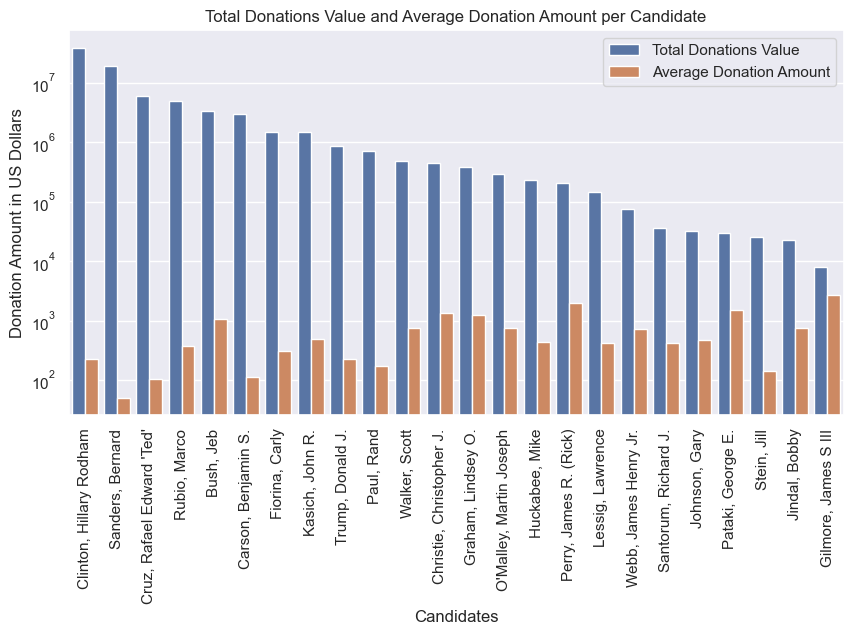

In [17]:
# Plotting the figure.
sns.set()
fig, ax = plt.subplots(figsize = (10,5))

# Make the barplot and order by total values of donations using the sorted donations amount
# per candidate table from question 2b (donations_cand_amt)
sns.barplot(x="candidate_name", y="amount", hue="value_type", order= donations_cand_amt["candidate_name"], data=long_df)

# Setting ticks on x axis
plt.xticks(rotation=90)

# Setting ticks on y axis and fixing format
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_yscale('log')

# Adding title, labels and legend.
ax.set_title("Total Donations Value and Average Donation Amount per Candidate")
ax.set_ylabel("Donation Amount in US Dollars")
ax.set_xlabel("Candidates")
ax.legend()
pass

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** Through this analysis I learned that the amount/count of donations a candidate receives is not equivalent to their donation value, so a candidate with few donations may still have a high total donation value. For example, Bernie Sanders received the most donations, but Hillary Clinton's total donations value was almost 10 million dollars higher than Bernie Sanders' total donation value. It was also interesting to see how the average donation amount per candidate is not representative of the candidate's total donation count and value. What clearly illustrates this is how the candidate with the most donations and second highest total donation value had the lowest average donation amount but the candidate with the least donations and lowest total donation value had the highest average donation amount: 
    - Bernie Sanders: 379284 donations, $19,062,998.80 total donation amount, and $50.26 average donation value 
    - Gilmore, James S III: 3 donations, $8,100.00 total donation amount, and $2,700.00 average donation value

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [18]:
# Hillary Clinton's candidate id is "P00003392" so we filter for her info using that id
contrib[contrib["cand_id"] == "P00003392"]["contbr_occupation"].value_counts().head()

contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [19]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    return df["contbr_occupation"].value_counts().head()
    

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [20]:
# First we need to create a subset of the data frame for these candidates using their ids
#'Trump, Donald J.'  - P80001571
# Bernie Sanders - P60007168
# Hillary Clinton - P00003392
subset = contrib[contrib["cand_id"].isin(["P80001571", "P60007168", "P00003392"])]

for candidate in subset["cand_nm"].unique():
    print(candidate)
    print(get_donors(contrib[contrib["cand_nm"] == candidate]), end = "\n")
    print("-"*50)

Clinton, Hillary Rodham
contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64
--------------------------------------------------
Sanders, Bernard
contbr_occupation
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: count, dtype: int64
--------------------------------------------------
Trump, Donald J.
contbr_occupation
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: count, dtype: int64
--------------------------------------------------


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [21]:
contrib.groupby("cand_nm").apply(get_donors)

cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** It is interesting to see the top 5 occupations of the people who donated to certain candidates because it seems to be in line with some of the stereotypical ideas of these candidates' supporters. For example, Donald Trump is a businessman and 3 out of the top 5 contributors' occupations are business-related roles. Bernie Sanders had a lot of support from Bay Area, CA voters, and his top 5 contributors' occupations reflect 2 of the most common jobs in the "Bay Area tech hub." It was also interesting to see that many of the top 5 contributors across all candidates are retired or not employed. There also seems to be a lot of similar occupations in top 5 contributors, such as "TEACHER", "ATTORNY", "ENGINEER" and "HOMEMAKER," and STEM-related roles, like engineering, mathematics, research, seem to be very common.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** I am curious to know what prior occupations RETIRED and NOT EMPLOYED contributors had since this occupation seems the be some of the leading contributors for many candidates. The average donation amount per candidate also seems to reflect some of the candidate contributors' top occupations. For example, the top/only contributors for the candidate with 3 donations but the highest average donation amount, Gilmore, James S III, are in investing and finance. These occupations are associated with large incomes, so it seems more reasonable as to why his donations average was very high. Additionally, since Bernie Sanders' top 2 contributor occupations are RETIRED or NOT EMPLOYED, his low average donation amount of about $50 also seems more reasonable, assuming that individuals with no employment have a temporarily lower income.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k